# Scikit Öğreniyorum: Python ile Makine Öğrenmesine Giriş

Bu örnekte Aurelion Geron'un Hands On Machine Learning Kitabındaki örnek üzerinden (biraz daha açıklayıcı ve yavaş giderek) Türkçe bir örnek ile Python ile makine öğrenme modeli kuracağız. 

Arada kitaptaki yoğun ve detaylara girmeyen anlatımı tamamlamak için epeyce kişisel notlar aldım.

En sonra ise bir değerlendirmem var.

İlgilenenlerin işine yaramasını umuyorum.

Dr. Suat ATAN

## Veri yükle

In [116]:
import pandas as pd
a=pd.read_csv("C:\Users\suata\Desktop\learn-scikit\housing.csv")

## Göz at

In [117]:
a.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Sütunlara ve dolu kayıt sayılarına bak

In [118]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Herhangi bir faktör değerde faktör adetlerine bak

In [119]:
a['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Değerlerin histogramlarına bak

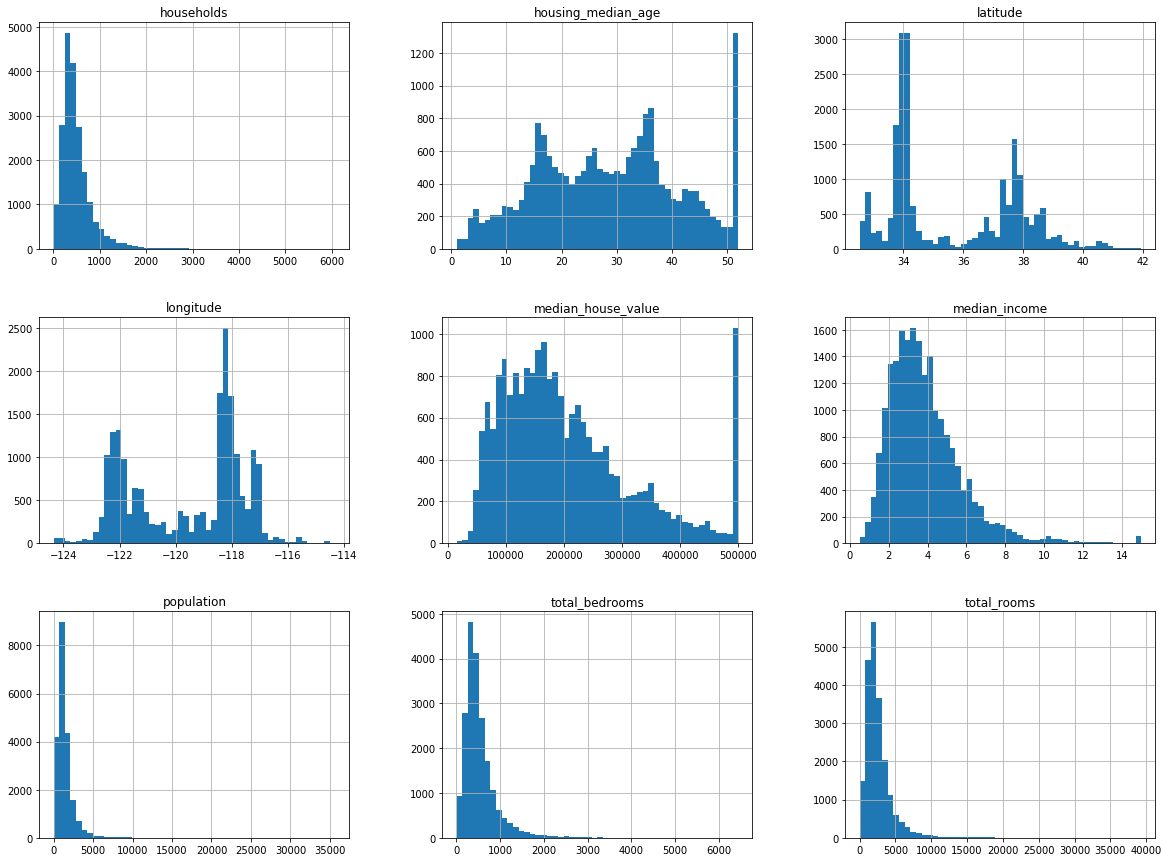

In [120]:
import matplotlib.pyplot as plt
a.hist(bins=50,figsize=(20,15))
plt.show()

## Test ve Eğitim Seti Oluşturmak

Eldeki veri setinden test ve eğitim datası şeklinde 2 parça oluşuracağız. Bu iki parça rastgele seçimle de yapılabilir ancak bazı kolonlarda bir yönde yığılma olabilir bunu engellemek için ise **Scikit** içinde hazır ve kullanışlı test seti ayırma fonksyonunu kullanacağız.

In [121]:
from sklearn.model_selection import train_test_split
#Aşağıdaki fonksyion a veri setinden train_set ve test_set diye iki parça veri oluşturuyor. 
#Bu oluşturma rastgele yapılıyor
#Bunu her çalıştırmada aynı şekilde yapmak için seed değeri olarak 42 giriliyor.
train_set, test_set = train_test_split(a, test_size=0.2, random_state=42)

In [122]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        3921 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


Not: Eğer veri seti *on-line* learning modunda sürekli güncellenecek (yani veri setine yeni kayıtlar girilecek) bir veri ise ID numaraları değişebileceğinden, ID olarak **sayısal bir** *unique* bir değer oluşturulmalıdır. Nitekim test setini ayıran fonksiyon bununla çalışmaktadır. Sayısal ID ise koordinatlar, tarihler gibi değerlerden türetilebilir.

## Veri Setinde Önemli Bir Parametrede Normal Dağılım Olmaması Durumu

Bir veri seti çok büyükse genellikle yukarıdaki gibi bir test set seçim işleminde sorun olmaz. Ancak diyelim ki parametrelerin birinde dağılım bir yöne çok eğilimli ve bu parametrenin modele zarar verebileceği düşünülüyor ise nbu durumda bu parametrenin verisi içinden normal dağılım olacak şekilde test ve eğitim seti ayrımı yapılabilir.  

Şimdi diyelim ki parametrelerimizden `median_income` çok kritik ve bunun dağılımına bakmak istedik. Bu durumda:

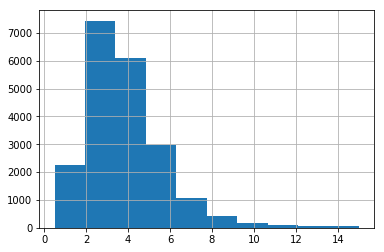

In [123]:
a['median_income'].hist()
plt.show()

Veri setimizde (test ve eğitim diye ayrılmadan önce) sola eğilim görüyoruz. Bu durumu test datası ayırma işleminde düzeltmek için hazır bir kütüphane mevcuttur. `StratifiedShuffleSplit` adlı bu kütüphane tanımladığımız *tabakaları* eşit olarak dağıtacak şekilde test datası seçimi yapabilir. Ancak bunun için tabaka tanımlamak gerekir. `median_income` değerini eşit dağılacak 5 tabakaya ayırmayı deneyelim:

In [124]:
import numpy as np
#Değerleri 1.5'a böl ve yuvarla
a["income_cat"] = np.ceil(a["median_income"] / 1.5)
#5'ten büyük olanları 5'e koy
a["income_cat"].where(a["income_cat"] < 5, 5.0, inplace=True)

In [125]:
a['income_cat'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

Böylece her bir satırda gelir kategorisini 1 ila 5 arasında bir sayıya dağıttık. Dağılıma tekrar bakalım:

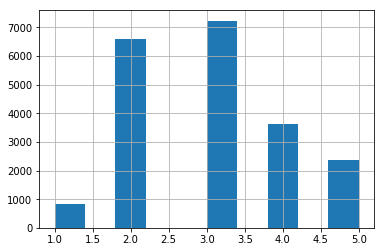

In [126]:
a['income_cat'].hist()
plt.show()

Şimdiki dağılımda her şey yoluında görünüyor. Dağılımdaki eğim giderildi. Şimdi bu `income_cat` kategorisine göre test ve eğitim verisini kesme işlemini `StratifiedShuffleSplit` kütüphanesi ile yapalım:

In [127]:
# Datamızı ["income_cat"]'a göre tabakalı shuffle ediyor.
from sklearn.model_selection import StratifiedShuffleSplit

#test ve train set'i yeniden hazırlıyoruz. bu kez bias yok
#income_cat değerine göre düzgün dağıltılmış  test srti ayırıyoruz
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(a, a["income_cat"]):
    strat_train_set = a.loc[train_index]
    strat_test_set = a.loc[test_index]

Hazırladığımız yeni *dengeli dağılımın* gerçekten öyle olup olmadığını göz atalım:

In [128]:
strat_train_set['income_cat'].hist()
plt.show()

`StratifiedShuffleSplit` kütüphanesi ile elde ettiğimiz bu setin dengeli olup olmadığını tespit için her bir kategorideki kayıt sayısının gelen kayıt sayısına oranını hesapladıktan sonra elde ettiğimiz değerin aynısını `StratifiedShuffleSplit` kütüphanesi olmadan elde ettiğimiz sonuçlarla mukayese edebiliriz. Bunun örneği Aurelion Geron'un kitabında Şekil 2.10'da bulabilirsiniz.

Son olarak artık test ve eğitim setimizi düzgün şekilde ayırdığımıza göre ilgili `income_cat` kolonumuzu kaldırabiliriz.

In [129]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Korelasyonlara Bakalım

Veri setimizdeki kolonlar arasındaki olası ilişkileri inceleyelim:

In [130]:
corr_matrix=a.corr()

Elde ettiğimiz matris içinden `median_house_value` değeri ile diğer kalemlerin ilişkisine bakalım:

In [131]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Gördüğümüz üzere, `median_house_value` değerimiz ile `median_income` değerimiz arasında kayda değer bir korelasyon var. Bu ilişkileri görsel olarak da inceleyebiliriz. Bunu sadece bazı kolonlar arasından gerçekleştirelim:

In [132]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(a[attributes], figsize=(12, 8))
plt.show()

İlişkili parametrelerin saçılım diyagramındaki şekillere dikkat edelim. Burada köşegen üzerinde saçılım diyagramları yerine histogramlar çıkmakta. Normalde aynı parametrenin kendisi ile saçılım diyagramının bir anlamı olmadığından bu alanlara `scatter_matrix` kütüphanesi ilgili kolonların dağılımını getiriyor.

## Yeni Parametreler Türetmek

Yukarıdaki korelasyonlarda bazı parametelerin aslında tahminlemek istediğimiz esas parametre olan ev fiyatını açıklamakta zayıf kaldığını görüyoruz. Bu parametreler ilk etapta değersiz gelebilir ancak bu parametreleri silip atmadan önce farklı yollarla değerlendirerek yeni denemeler yapmakta fayda vardır. Neticede makine öğrenmesi modelleri iteratif olarak ilerler. Yani bir prototip yaptıktan sonra onu güçlendire güçlendire ilerlersiniz/ilerlemelisiniz.

Bunun için, en zayıf parametrelerden biri olan `total_rooms` parametresini ele alalım. Bir muhitteki toplam oda sayısının oradaki ev fiyatlarını açıklamada tek başına anlamı olmayabilir. Ancak bu değeri oradaki nüfusa bölerek anlamlı değerler bulabiliriz. Netice bir yerde kişi başına düşen oda sayısı yükseldikçe oradaki refah seviyesinin yüksek olduğunu dolayısıyla ev fiyatlarına da etkisi olabileceğini tahmin etmek güç değildir.


In [133]:
a["rooms_per_household"] = a["total_rooms"]/a["households"]
a["bedrooms_per_room"] = a["total_bedrooms"]/a["total_rooms"]
a["population_per_household"]=a["population"]/a["households"]

Şimdi hesapladığımız bu değerlerle diğer parametreler arası korelasyonları inceleyelim.

In [134]:
corr_matrix = a.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Evet çiçeği burnunda parametremiz `bedrooms_per_room` kendisini türettiğimiz `total_bedrooms` parametresinden daha güçlü şekilde (süper değilse de) ilişkili çıktı (%25).  Ancak diğer iki yeni parametremiz o kadar da güçlü değildi. Ancak ancak denemekte her zaman yarar vardır.

## Veri setini makine öğrenme algoritmalarına hazırlamak

Veri setini ve etiketleri ayıralım:

In [135]:
a = strat_train_set.drop("median_house_value", axis=1) # tahmin edilecek değişken kolonunu kaldıralım
a_labels = strat_train_set["median_house_value"].copy() #katmanlı eğitim datasındaki etiketlerimizi ayrı bir yerde tutalım
a_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

## Eksik verileri temizlemek ya tamamlamak

Veri setimizde `a.info()` komıutunu kullanarak baktığımızda bazı kolonlarda eksik değerlerin olduğunu göreceğiz.

In [136]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Bu boş değerleri içeren satırları silmek için `a.dropna(subset=['kolon_adi'])` komutu ile silebiliriz. Bunu yaptığımızda eğer o kolonda boş değer varsa tam boş değerin bulunduğu satırın tamamı içindeki değerlerle birlikte silinir. Diğer yöntem ise bu değerleri silmek yerine boş değerin yerine ortalama veya medyan değer koymaktır. Böylece silmeye gerek kalmaz. Bunun için ise `a['kolon_adi'].fillna(median)` komutu ile ilgili kolondaki boş değerler yerine o kolonun medyan değerlerini yerleştiririz.

Bir de SciKit içinde `Imputer` adlı bir kütüphane bulunmaktadır. Bu kütüphane de bu işe yarar. Bu kütüphane tüm veri seti içinde eksik hücreleri uygun değerler ile doldurmak içindir. Bu nedenle sayısal olmayan `ocean_proximity` gibi metinsel değerler için görevini icra edemez. Bu amaçla önce bu metinsel değer içeren kolonları silip yerine sayısal değer ekleyeceğiz. Böylece tüm kolonlarda veri eksiksiz dolacak. 

In [137]:
#Imputer'i çağır ve göreve hazır hale getir
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

#Sayısal olmayan değerleri sil ve kalanları a_num değişkenine ata
a_num = a.drop('ocean_proximity', axis=1)
# şöyle de diyebilirdik: housing_num = housing.select_dtypes(include=[np.number])

In [138]:
#İşte şimdi imputer'i çalıştırıyoruz
imputer.fit(a_num)
X = imputer.transform(a_num)

`Imputer` işlemini yaptıktan sonra bize `np.array` nesnesi yollar. Bu nedenle örneğin `.info()` gibi fonksiyonlar çalışmayabilir. Bu amaçla `a_num` değişkenimizi tekrar Panda data frame nesnesine dönüştürüyoruz:

In [139]:
#index değerleri olarak sıra bozulmamış olduğundan aynen ilk parametremiz olan a'daki değerleri alıyoruz
a_tr = pd.DataFrame(X, columns=a_num.columns,
                          index = list(a.index.values))

In [140]:
#Bakalım NaN değer içeren kayıt kalmış mı?
nans = lambda df: df[df.isnull().any(axis=1)]
nans(a_tr)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income]
Index: []

## Metinsel Kategorik Değerlerin Sayısallaştırılması

Veri setimizdeki kolonlardan `ocean_proxmity` adlı değişken metinsel haldedir. Bu haliyle bazı makine öğrenme algoritmalarında model kurulduğunda sorun oluşabilir. Bunun için en emin yol metinsel değerlerin sayısal hale getirilmesidir. Bunu sağlamak için ise *okyanusa yakınlık* parametremizdeki her bir kategoriyi birer parametreye çevirerek her satırda karşışına 1 veya 0 yazabiliriz. Daha somut bir örnek olarak şöyle düşünelim: `araba` ve `renk`şeklinde iki kolonlu veri setimizde sadece 3 renk olsun. Bu durumda renk değerleri metinsel yazılmıştır. Örneğin: `audi`,`mavi` gibi. Bu veri setini `araba`,`mavimi`,`sarimi`,`siyahmi` şeklinde yazıp değer olarak da yeniden şöyle yazabiliriz: `audi`,1,0,0.
İşte bu işlemin tek seferde yapan bir Scikit kütüphyanesi var: `OneHotEncoder`. Şimdi bu kütüphaneyi kullanarak `ocean_proxmity`adlı değişkenimizi sayısallaştıralım. Bunun için önce bu kolonu ayıralım:

In [141]:
a_cat=a['ocean_proximity']
a_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

Bu değerlerleri faktörize edelim (sayısal hale getirelim)

In [142]:
a_cat_encoded, a_categories = a_cat.factorize()
#değerlere göz at
a_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [143]:
#kategorilere göz at
a_categories

Index([u'<1H OCEAN', u'NEAR OCEAN', u'INLAND', u'NEAR BAY', u'ISLAND'], dtype='object')

In [144]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
a_cat_1hot = encoder.fit_transform(a_cat_encoded.reshape(-1,1))
a_cat_1hot

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

`OneHotEncoder` değerleri numpy matris olarak dönderir. Bun arraya çevirip görebiliriz.

In [145]:
a_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

Böylece okyanusa yakınlık değerimizideki 6 kategori yukarıdaki gibi sayısal hale gelmiş olur. 

Bu dönüşüm işlemini adım adım yapmak yerine `CustomTranformer` fonksiyonarı hazırlayarak tek seferde de yapabiliriz. Şimdilik sadeliği bozmamak için bunu yapmayacağız. 

Şimdi elde ettiğimiz bu değerleri ne yapacağız? Hiç bir şey! Birazdan yukarıda yaptığımız tüm veri dönüşüm işlemlerini tek seferde yapacak ve daha sonra da kolayca kullnılabilecek **Pipeline** ve Pipeline'leri art arda çalışıran **FeatureUnion** özelliğini öğreneceğiz.

## Pipeline ve Feature Union

Daha makine öğrenme modeli kurmadan yapılan veri temizleme ve dönüşüm işlemleri çok yorucu gözükebilir. Ayrıca bu kodun tekrar kullanılabilirliği de pek iyi sayılmaz. Scikit bu noktada da bizi düşünerek dönüşüm işlemlerini standartlaştırabilmemiz için Pipeline adı verilen ve adım adım çalışan bir yol haritası verir. Burada yol haritasındaki çoğu fonksiyon yukarıda gördüğümüz `Imputer` gibi standart fonksiyonlardır. Scikit diğer dönüşümler için (örneğin ek parametreler yaratmak) için ise bir nevi kendi dönüşüm fonksiyonlarımızı yazarak diğer hazır Pipeline adımları ile birlikte kullanmamızı önerir. Şimdi yukarıda uzun uzun yaptığımız dönüşüm işlerini tek seferde yapacak Pipeline'ı yazacağız. Bir pipeline genellikle bir tür dönüşüme dair süreçleri içerir. Farkli Pipeline'ler yazıp bir arada da çalıştırabiliriz bunun için ise `FeatureUnion` kütüphanesi kullanılır.

Şimdi bu süreci tastamam çalıştırmak için yukarıda elle yazdığımız kategori dönüştürücümüzü Pipeline içinden tek seferde çağırdığımızda çalıştırılabilir hale getirelim. Bunun için şu fonksiyonu yazarız:

In [146]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

Şimdi de daha önce elle oluşturduğumuz kişi başına oda sayısı gibi yeni parametreleri hesaplama işini yapan kendi özel dönüştürücümüzü yazalım:

Bu dönüştürücü formatı, daha sonra kendi başka özel dönüştürücülerinizi nasıl kullanacağınıza dair basit bir örnek de sunuyor. Bu dönüştürücüler Pipeline dışından özel olarak da çağrılabilir.

In [147]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


Scikit **sadece Numpy** ile çalışıtır (şimdilik). Henüz Panda data frame nesneleri ile çalışmaz. Panda data framelerimizden NumPy'e her seferinde dönüşüm yapmak yerine Pipeline içinde kullanmak üzere bir dönüştürücü de bu iş için yazılmalıdır.

In [148]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Şimdi ise yukarıda bize has özel dönüştürücü ile birlikte tüm dönüştüm fonksiyonlarını Pipeline olarak tanımlayalım.

In [149]:
from sklearn.pipeline import Pipeline
#feature scaler dönütürücüsü
from sklearn.preprocessing import StandardScaler

#veri setimizdeki sayısal ve kategorik değerlerimizi ayırıyoruz
num_attribs = list(a_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

İşte şimdi dananın kuyruğu kopuyor. Tüm pipeline'larımızı `FeatureUnion` ile çalıştıracağız.

In [150]:
from sklearn.pipeline import FeatureUnion

#pipeline'larımız
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
#hadi gaza bas:)))
a_prepared = full_pipeline.fit_transform(a)
print(a_prepared)
print
print(a_prepared.shape)

[[-1.15604281  0.77194962  0.74333089 ...,  0.          0.          0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...,  0.          0.          0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...,  0.          0.          1.        ]
 ..., 
 [ 1.58648943 -0.72478134 -1.56295222 ...,  0.          0.          0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...,  0.          0.          0.        ]
 [-1.43579109  0.99645926  1.85670895 ...,  0.          1.          0.        ]]

(16512L, 16L)


İşte bu kadar, `a` parametresine atadığımız ham veri makine öğrenmesi modellerine hazır olarak `a_prepared` şeklinde çıktı. Hayırlı olsun. Şimdi, nihayet makineye bir şeyler öğretebiliriz.

## Regresyon Modelini Makineye Öğretiyoruz

In [151]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
#daha önce hazırladığımız a_prepared ve a_labels değişkenlerimizi kullanıyoruz
lin_reg.fit(a_prepared, a_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Modelimiz hazır. Evet, hadi kendisine bazı tahminler yapmasını söyleyelim. 5 satır veri alalım:

In [152]:
some_data = a.iloc[:5]
some_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN

In [153]:
#aynı yerin etiketlerini alalım
some_labels = a_labels.iloc[:5]
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

İşte şimdi yukarıda hazırladığımız dönüştürücülerin gücünü göreceğiz. Denemek için aldığımız `some_data` değişkenimizi dönüştürüp kullanalım:

In [154]:
some_data_prepared = full_pipeline.transform(some_data)

Tek satırda verilerimizi hazırladık.Şimdi etiketlerini (yani doğru cevapları) söktüğümüz `some_data` verilerimizi alıp modelimizle tahmin yapalım.

In [155]:
print("Predictions:", lin_reg.predict(some_data_prepared))

('Predictions:', array([ 210644.60459286,  317768.80697211,  210956.43331178,
         59218.98886849,  189747.55849879]))


Modelimiz  yukarıdaki değerleri tahmin etti. Bakalım gerçek değerlerimiz nedir ve tahminler değerlerimize ne kadar yaklaşmış?

In [156]:
print("Labels:", list(some_labels))

('Labels:', [286600.0, 340600.0, 196900.0, 46300.0, 254500.0])


Bu küçük some_data veri setimiz için fena değil. Şimdi ise daha önce hazırladığımız tüm verilerden elde ettiğimiz modeli test edelim. Bu kez tahminlerle gerçek değerleri mukayese edemeyeceğimize göre (16 bin küsur değer var) RMSE ile (eğer RMSE ile tanışmadıysanız hemen bir Google yapın derim, şimdilik bir başarı ölçütü olarak bilin) modelin gücüne bakacağız.

In [157]:
from sklearn.metrics import mean_squared_error

#tahminlerini yap aslan modelim, modelimizin adı lin_reg hani yukarıda onu oluşturmuştuk
a_predictions = lin_reg.predict(a_prepared)
#şimdi modelin buldukları ile gerçek değerleri mukayese edelim:
lin_mse = mean_squared_error(a_labels, a_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

Bu değer de ne? Bu değer tahmin etmeye çalıştığımız emlak değerinin ortalama olarak  68 bin dolar civarında hataya kadar hata yapabileceğini söylüyor. Şimdi ev fiyatlarının 120 bin ila 265 bin civarında olduğunu düşünürsek hata biraz fazla. 

Neden? Demek ki veri setimizdeki bilgiler tahmin etmeye çalıştığımız emlak fiyatı için yeterli veri sağlamıyor. Bu duruma makine öğrenme literatüründe (camiamızda diyelim:) *underfitting* denilir. 


Aşmanın yolları:

- Daha fazla veri bulmak (Modelimiz regularize edilmediğinden --şimdilik unuttum-- şimdilik caiz değil)
- Yeni parametreler bulabilir veya üretebiliriz. Üretmek mi? Yani mevcut parametrelerin logaritmasını almak veya daha önce gördüğümüz gibi özel parametreler türetmek suretiyle bu olabilir.
- Farklı makine öğrenme modelleri deneyebiliriz.

Deneyelim. Bunun için ek işe gerek yok. Veri setimizi bu kez `DecisionTreeRegressor` makine öğrenme modeli ile deneyelim

## Karar Ağacı Regresyonu ile Deney

In [158]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(a_prepared, a_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Çat, çat ! Model hazır. Şimdi gücüne bakalım:

In [159]:
a_predictions = tree_reg.predict(a_prepared)
tree_mse = mean_squared_error(a_labels, a_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Sıfır hata!** Ancak heyecanlanmayın. Bu imkansız. Bu durumun tam adı **overfitting** durumudur. Model eldeki veri setine kusursuz uyum sağlamıştır. İşte test setini tam da bunun için ayırıyoruz. Dikkat ettiyseniz henüz test verisine elimizi sürmedik. Şimdilik modelimizden tam emin olana kadar da elimizi sürmeyeceğiz.

## K-Fold ile Test

Yukarıda sıfır hata veren modelimizin gerçek gücünü ayırdığımız test seti üzerinden görebiliriz. Bu bir alternatif. Ancak başka bir alternatif daha var. K-Fold olarak adlandırılan bu yöntemde veri setinden `k` kez (bu değer bize kalmış, zaman ve bilgisayar gücümüze göre ne kadar çoksa o kadar iyi) tesadüfi test seti seçip, modeli her bir sette deneyerek gücünü ayrı ayrı test setlerinde (fold denilir) çıkan başarı ölçütlerinin ortalamasını alarak hesaplarız. Bu yöntem aslında eğitim verisinin değişimine göre modelin gücünü daha iyi şekilde ölçer. Peki K-Fold işlemini elle mi yapacağız? Scikit bunu da düşünmüş. Aşağıdaki kodlarda göreceğiniz üzere, `cv` parametresine verdiğiniz sayıya göre bu işlemi hızlıca yapıp sonuçları veriyor.

In [160]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, a_prepared, a_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [161]:
#Sonuçları görelim
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

('Scores:', array([ 70232.0136482 ,  66828.46839892,  72444.08721003,  70761.50186201,
        71125.52697653,  75581.29319857,  70169.59286164,  70055.37863456,
        75370.49116773,  71222.39081244]))
('Mean:', 71379.074477063608)
('Standard deviation:', 2458.3188204349362)


Hani nerede? `DecisionTreeRegressor` modelimizi test seti ayırmadan denediğimizde sıfır hata vermişti. Şimdi ise kel düştü,takke göründü. Model 71 bin dolar civarında hata yapıyor. Standart sapma 10 deneme arasındaki standart sapma yani aslında hatamız 71 artı eksi 2.4 bin. Madem bu K-Fold metodu keli gösteriyor daha önce adam yerine koymadığımız regresyonu bu teste sokalım şimdi:

In [162]:
#dikkat bu kez lin_reg'i mülakata sokuyoruz.
lin_scores = cross_val_score(lin_reg, a_prepared, a_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

('Scores:', array([ 66782.73843989,  66960.118071  ,  70347.95244419,  74739.57052552,
        68031.13388938,  71193.84183426,  64969.63056405,  68281.61137997,
        71552.91566558,  67665.10082067]))
('Mean:', 69052.461363450828)
('Standard deviation:', 2731.6740017983425)


Evet K-Fold ile kimin ne idüğünü öğrendik:) Bu kez regresyonun aslında bu veri seti için karar ağacı regresyon modelinden daha güçlü olduğunu gördük. Ancak halen hata payı yüksek 69 bin dolar civarında. İşte şimdi artık bu iki model yerine üçüncü bir modeli denememizin zamanı geldi.

## Random Forest Algoritmasını Deneyelim

In [163]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(a_prepared, a_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [164]:
#bookmark adı: lezgin
a_predictions = forest_reg.predict(a_prepared)
forest_mse = mean_squared_error(a_labels, a_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21941.911027380233

K-Fold ile deneme yapmadık henüz ancak veri setimizin tamamı üzerinde Lineer Regresyon ve Karar Ağacı Regresyon modeline göre daha iyi bir değer aldık. 60 veya 70 bin dolarlara göre 21 bin dolara hata daha kabul edilebilir. Şimdi de K-fold ile Random Forest algoritmasının gücünü test edelim

In [165]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, a_prepared, a_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

('Scores:', array([ 51650.94405471,  48920.80645498,  52979.16096752,  54412.74042021,
        50861.29381163,  56488.55699727,  51866.90120786,  49752.24599537,
        55399.50713191,  53309.74548294]))
('Mean:', 52564.190252440123)
('Standard deviation:', 2301.8738039197542)


Mean değerimiz bu kez bu algoritmanın da hata payının aslında 50 bin civarında olduğunu söylüyor. Yine fena değil ancak esas problemli durum şu. Test Veri Setindeki Hata (TESTHATA), tüm veri setindeki hata (TÜMHATA)'dan büyük. Yani veri overfitting'e devam ediyor. Unutmamamk için durumu özetliyoruz. 

Overfitting: TESTHATA > TÜMHATA

(Büyüklük ifadesini birerbir almayın, bu notasyonu şöyle düşünün K-Fold ile test edince çıkan hata tüm veri setindeki hatadan daha fazla)

Overfitting'in dermanı ise 2 türlü olabilir.

- Modeli regülarize etmek (sınırlandırmak)
- Daha fazla data ile eğitmeye devam etmek (underfit durumunda da aynı derman yöntemlerden biri)

Hatırlatmak için söyleyelim:

Underfitting: TESTHATA < TÜMHATA

Bu durumu da `DecisionTreeRegressor` dan hatırlayın. Test seti (K-Fold) ile deneme yaptığımızda çıkan hata, tüm veri seti ile yaptığımız denemeden daha fazla hataya sahipti. Tüm veri seti üzerinde deneme yapınca %100 doğruluk almıştık, Bu nedenle RMSE 0 çıkmıştı. 

**Başka bir deyimle**
K-Fold deneyi tüm veri seti ile deneyden daha iyi sonuç veriyorsa *Overfit* diğer türlü *Underfit*.

Bu aşamadan sonra ne yağacağız?

Yine parametrelerle oynayarak ya da underfit veya overfit duurmları için önerilen metotları kullanarak tekrar deneyebiliriz ancak şu  ilkeye uymalı ve unutmamalıyız:

**Makine Öğrenme Modellerinde bildiğimiz modellerin tamamı ile deneme yapmadan, parametreler ile oynamaya girmemeliyiz**


<hr>
**NOT**: Bu kadar modelle deneme yaptıktan sonra modelleri her seferinde tekrar çalıştırmak yerine *joblib* adlı kütüphane ile daha sonra göz atmak ve mukayese etmek için pkl formatında kaydedebiliriz.
<hr>


## SVR modeli ile deneme yapalım

In [166]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(a_prepared, a_labels)
housing_predictions = svm_reg.predict(a_prepared)
svm_mse = mean_squared_error(a_labels, a_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

21941.911027380233

Bu model diğerlerinden daha kötü performans sergiledi. İşte şimdi (Tabi deneyecek başka model bilmiyorsak) parametrelerle oynama zamanı geldi. Şu anda denediğimiz algoritmalardan hangisinin daha güçlü olduğunu biliyoruz. Bu bilgimize göre hareket edeceğiz.

## Grid Search ile En İyi Parametre Kombinasyonu

Farklı parametre kombinasyonlarını deneyerek modeldeki sorunları giderebiliriz ancak bunu tek tek yapmak zamana alıcı bir iştir hele ki çok fazla sayıda kolonumuz varsa. Bunu bizim yerimize yapacak yöntemi yine Scikit düşünmüş.

In [167]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
#burada Grid Search metodunu yukarıda en iyi sonucu veren Random Forest üzerinde deniyoruz.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(a_prepared, a_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

En iyi parametreleri bulalım:

In [168]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Şimdi olası tüm kombinasyonların değerlerine bakalım. Bakalım gerçekten de yukarıdaki kombinasyon en iyi mi?

In [169]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

(63647.854445959922, {'max_features': 2, 'n_estimators': 3})
(55611.501598763272, {'max_features': 2, 'n_estimators': 10})
(53370.064073633439, {'max_features': 2, 'n_estimators': 30})
(60959.138858487866, {'max_features': 4, 'n_estimators': 3})
(52740.584166652523, {'max_features': 4, 'n_estimators': 10})
(50374.142146147307, {'max_features': 4, 'n_estimators': 30})
(58661.2866461823, {'max_features': 6, 'n_estimators': 3})
(52009.973979776936, {'max_features': 6, 'n_estimators': 10})
(50154.117773684942, {'max_features': 6, 'n_estimators': 30})
(57865.361680144459, {'max_features': 8, 'n_estimators': 3})
(51730.075508665534, {'max_features': 8, 'n_estimators': 10})
(49694.851433344418, {'max_features': 8, 'n_estimators': 30})
(62874.407393096284, {'max_features': 2, 'n_estimators': 3, 'bootstrap': False})
(54643.499808344663, {'max_features': 2, 'n_estimators': 10, 'bootstrap': False})
(59437.892285884191, {'max_features': 3, 'n_estimators': 3, 'bootstrap': False})
(52735.35829362104

Evet, en düşük RMSE değerinin 8 e 30'da olduğunu görüyoruz.

Daha detaylı sonuçlar

In [170]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0          0.0656           0.0026    -4.051049e+09     -1.106013e+09   
1          0.1790           0.0078    -3.092639e+09     -5.819353e+08   
2          0.5488           0.0238    -2.848364e+09     -4.396234e+08   
3          0.0892           0.0030    -3.716017e+09     -9.850011e+08   
4          0.2848           0.0078    -2.781569e+09     -5.160154e+08   
5          0.8510           0.0240    -2.537554e+09     -3.878685e+08   
6          0.1186           0.0036    -3.441147e+09     -9.030212e+08   
7          0.3752           0.0078    -2.705037e+09     -5.014210e+08   
8          1.1452           0.0234    -2.515436e+09     -3.840197e+08   
9          0.1408           0.0032    -3.348400e+09     -8.884890e+08   
10         0.4852           0.0080    -2.676001e+09     -4.923247e+08   
11         1.4560           0.0228    -2.469578e+09     -3.809175e+08   
12         0.0870           0.0034    -3.953191e+09      0.000000e+00   
13         0.3106           0.0098    -2.985912e+09     -6.056027e-01   
14         0.1104           0.0034    -3.532863e+09     -1.214568e+01   
15         0.3678           0.0098    -2.781018e+09     -5.272080e+00   
16         0.1340           0.0034    -3.305102e+09      0.000000e+00   
17         0.4438           0.0090    -2.601843e+09     -3.028238e-03   

   param_bootstrap param_max_features param_n_estimators  \
0              NaN                  2                  3   
1              NaN                  2                 10   
2              NaN                  2                 30   
3              NaN                  4                  3   
4              NaN                  4                 10   
5              NaN                  4                 30   
6              NaN                  6                  3   
7              NaN                  6                 10   
8              NaN                  6                 30   
9              NaN                  8                  3   
10             NaN                  8                 10   
11             NaN                  8                 30   
12           False                  2                  3   
13           False                  2                 10   
14           False                  3                  3   
15           False                  3                 10   
16           False                  4                  3   
17           False                  4                 10   

                                               params  rank_test_score  \
0            {u'max_features': 2, u'n_estimators': 3}               18   
1           {u'max_features': 2, u'n_estimators': 10}               11   
2           {u'max_features': 2, u'n_estimators': 30}                9   
3            {u'max_features': 4, u'n_estimators': 3}               16   
4           {u'max_features': 4, u'n_estimators': 10}                8   
5           {u'max_features': 4, u'n_estimators': 30}                3   
6            {u'max_features': 6, u'n_estimators': 3}               14   
7           {u'max_features': 6, u'n_estimators': 10}                6   
8           {u'max_features': 6, u'n_estimators': 30}                2   
9            {u'max_features': 8, u'n_estimators': 3}               13   
10          {u'max_features': 8, u'n_estimators': 10}                5   
11          {u'max_features': 8, u'n_estimators': 30}                1   
12  {u'max_features': 2, u'n_estimators': 3, u'boo...               17   
13  {u'max_features': 2, u'n_estimators': 10, u'bo...               10   
14  {u'max_features': 3, u'n_estimators': 3, u'boo...               15   
15  {u'max_features': 3, u'n_estimators': 10, u'bo...                7   
16  {u'max_features': 4, u'n_estimators': 3, u'boo...               12   
17  {u'max_features': 4, u'n_estimators': 10, u'bo...                4   

    split0_test_score       ...         split2_test_score  split2_tr

## Grid Search Sonuçlarına Göre En iyi Parametreleri Bulma

Yukarıdaka Grid Search'ın bulduğu best_estimatör üzerinden modelde açıklayıcılığı en yüksek parametreleri bulabiliriz. 

In [171]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.33442355e-02,   6.29090705e-02,   4.11437985e-02,
         1.46726854e-02,   1.41064835e-02,   1.48742809e-02,
         1.42575993e-02,   3.66158981e-01,   5.64191792e-02,
         1.08792957e-01,   5.33510773e-02,   1.03114883e-02,
         1.64780994e-01,   6.02803867e-05,   1.96041560e-03,
         2.85647464e-03])

In [172]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813429, 'median_income'),
 (0.1647809935615904, 'INLAND'),
 (0.10879295677551572, 'pop_per_hhold'),
 (0.073344235516012421, 'longitude'),
 (0.062909070482620288, 'latitude'),
 (0.056419179181954007, 'rooms_per_hhold'),
 (0.053351077347675809, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402766, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407802, 'households'),
 (0.014106483453584106, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201579, 'NEAR OCEAN'),
 (0.0019604155994780693, 'NEAR BAY'),
 (6.0280386727365977e-05, 'ISLAND')]

Yukarıda görüldüğü üzere okyanusa yakınlık parametrelerinden sadece biri güçlü bir açıklayıcılık gücüne sahip. Diğerleri görece önemsiz. Buna göre okyanusa yakınlık parametrelerinin diğerlerini silebiliriz. Ayrıca `median_income` en güçlü parametremiz.

Okyanusa yakınlık parametresinin eskiden kategorik bir değer olduğunu daha sonra bu parametreyi `OneHotEncoder` ile çoğalttığımızı hatırlayın.

<hr>
**Not**: Grid Search kolon sayısı az iken sistem kaynaklarını çokça yormadan en iyi parametre kombinasyonunu seçer. Eğer çok kolon varsa *Randomized Search* kullanabilirsiniz. Kullanım şekli kodsal açıdan GridSearch ile aynıdır.
<hr>

Şimdi seçtiğimiz en iyi model olan RandomForest ile seçtiğimiz parametreler ile modelimizi bir daha test edelim.
İşte şimdi modelimizi gerçek test seti ile deneme zamanı.

## Sistemimizi gerçek test verisi üzerinden test edelim

In [173]:
#seçtiğimiz modeli grid search'taki en iyi estimatörlerle alıyoruz
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [174]:
# katmanlı test setinden y değerini sil
X_test = strat_test_set.drop("median_house_value", axis=1)
# y değerini başka parametreye ata
y_test = strat_test_set["median_house_value"].copy()

#üzerinde modelin sıfırdan test edileceği datayı dönüştür (daha önce hazırladığımız pipeline ile) 
X_test_prepared = full_pipeline.transform(X_test)
# nihai tahminleri yap
final_predictions = final_model.predict(X_test_prepared)
#modeli değerlendir
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

Vee sonuç:

In [175]:
final_rmse

47766.003966433083

İşte bu kadar... Şimdi biraz konuşalım.

## Sonuçlar ve  Dr. Suat ATAN Notları

** Son RMSE'yi yorumlama**

Bu 47 bin küsür değeri bookmark lezgin'de gördüğümüz random forest modelinin k-fold ile testinde elde ettiğimiz sonuç olan 21 bin küsür değerinden biraz daha kötü çıkmıştır. Bu normaldir. Nitekim K-fold ile bile olsa modele henüz en sonda test veri setindeki değerler girmemiştir. Çünkü daha önce eğitim datası üzerinden yaptığımız deneylerde seçtiğimiz algoritma ve model tamamen bilinmeyen bir test seti üzerine denenmiştir.

** Test ve eğitim verisi ayrımı**

**Çok önemli**: İnternette ve bazı kitaplarda test ve eğitim datası ayrımı konusu daha basit bir biçimde ele alınmaktadır. Buradaki örnekte ise daha kompleks ancak güvenilir bir yol izlenmektedir. 

Bunu daha detaylı ifade edecek olursak. (Notasyona takılmayın). Basit yöntemde A veri setimiz AE eğitim  verisi ve AT test verisine ayrılır, AE eğitim verisinde model üretilir AT verisinde test edilir ve test tahminleri ile test verisinin bilinen etiketleri mukayese edilmek suretiyle modelin gücü ölçülür.

Kompleks yöntemde ise A veri seti AQ eğitim verisi ve AC cross-validation verisi olarak ikiye ayrılır. AQ eğitim verisinin tamamından T1 testi yapılır sonra  K-Folding ile defalarca farklı test serisi seçilir ve model otomatik olarak test edilir ve K1 testi   testi yapılır Underfitting ve overfitting durumlarına göre model için seçilen makine algoritmaları değiştirilir, en uygun algoritma seçilir.  En uygun algoritma seçiminden sonra (yukarıdaki örnekte random forest idi) GridSearch veya Randomized Search ile **Hyperparameter Tuning** yani en uygun parametreleri seçme işlemi yapılır. Bu işlemde seçilen parametreler (elle değil best_evaulator metodu ile) alınır ve seçilen algoritmaya konur. Bu kez algoritma ta başta ayrılmıl AC cross-validation seti üzerinden **hem eğitilir hem test edilir**. Böylece basit yaklaşımdan farklı olarak tamamen farklı veri seti üzerinde model hem denenmiş hem test edilmiştir. Süreç burada son bulur.

**R'dan farkı**

Daha önce makine öğrenme algoritmalarını daha çok R ile denemiştim. Python ve Scikit kullanımında en çok dikkat ettiğim özellikler şunlar. İşte tecrübe:)

Scikit'in artıları:

- Scikit özellikle Imputer ve OneHotEncoder ile çok kullanışlı ve ileri özellikler sunuyor. R'da muhakkak vardır ancak hiç karşılaşmadım.

- Pipeline ve Pipeline'ları bir araya getiren FeaturedUnion özelliği'de Scikit'de sevdiğim özellikler'den. R'da görmedim.

- GridSearch özelliğine yani en iyi kombinasyonun da bi zahmet makine tarafından bulunması (Hyperparameter Tuning) özelliğine bayıldım. 

R'ın artıları:

- Jupyter Notebook halen R Studio'nun yanından geçmez.
- SciKit NumPy üzerinde çalışıyor ancak Pandas data frameleri üzerinde çalışmıyor. Bu bir ayıp. R'da makine öğrenme modelleri benim kullandığım caret kütüphanesi üzerinde data frame'de çalışıyor.

Her ikisinde de mevcut olanlar:

- K-Folding R'da Caret kütüphesinde de var.
